In [1]:
# from sklearn import preprocessing
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('breastcancer.csv', header=None, na_values="?")
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    8
6    0
7    0
8    1
9    0
dtype: int64

In [3]:
df.head()


,0,1,2,3,4,5,6,7,8,9
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
from sklearn.impute import SimpleImputer

In [5]:
si = SimpleImputer(strategy='most_frequent')

In [6]:
df2 = si.fit_transform(df)
df2 = pd.DataFrame(df2)

In [7]:
df2.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
le = LabelEncoder()

In [10]:
cols=[0,1,2,3,4,5,7,8,9]
for i in cols:
    df2[i] = le.fit_transform(df2[i])
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0


In [11]:
df2.describe()

,0,1,2,3,4,5,7,8,9
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.297203,2.664336,1.073427,4.804196,0.513986,0.195804,0.468531,1.779720,0.237762
std,0.457828,1.011818,0.986680,2.470198,1.104129,0.397514,0.499883,1.087605,0.426459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,2.000000,0.000000
max,1.000000,5.000000,2.000000,10.000000,6.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
target = df2[0]
target.shape

(286,)

In [13]:
data=df2.drop(columns=[0])
data.shape

(286, 9)

In [14]:
data.head()

,1,2,3,4,5,6,7,8,9
0,1,2,5,0,0,3,0,1,0
1,2,2,3,0,0,2,1,4,0
2,2,2,3,0,0,2,0,1,0
3,4,0,2,0,0,2,1,2,0
4,2,2,0,0,0,2,1,3,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [17]:
x_train.shape


(214, 9)

In [18]:
from sklearn.linear_model import Perceptron

In [19]:
p = Perceptron(penalty="l2")  #l1, elasticnet anotherone method
p.fit(x_train,y_train)

Perceptron(penalty='l2')

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
p_train_pred = p.predict(x_train)

In [22]:
print("Training Accuracy",  accuracy_score(p_train_pred,y_train))

Training Accuracy 0.5981308411214953


In [23]:
from sklearn.linear_model import LogisticRegression


In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
lr_train_pred = lr.predict(x_train)

In [27]:
lr_test_pred = lr.predict(x_test)

In [28]:
print("Training Accuracy", accuracy_score(lr_train_pred,y_train))

Training Accuracy 0.7383177570093458


In [29]:
print("Training Accuracy", accuracy_score(lr_test_pred,y_test))

Training Accuracy 0.7083333333333334


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_id = DecisionTreeClassifier(criterion='log_loss', max_depth=3) #default = gini #entropy

In [32]:
dt_id.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3)

In [33]:
dt_train_pred=dt_id.predict(x_train)

In [34]:
dt_test_pred=dt_id.predict(x_test)

In [35]:
print("Training Accuracy",  accuracy_score(dt_train_pred,y_train))

Training Accuracy 0.7616822429906542


In [36]:
print("Training Accuracy",  accuracy_score(dt_test_pred,y_test))

Training Accuracy 0.7638888888888888


In [37]:
from sklearn.tree import plot_tree

[Text(0.4583333333333333, 0.875, 'X[3] <= 0.5\nlog_loss = 0.902\nsamples = 214\nvalue = [146, 68]'),
 Text(0.25, 0.625, 'X[2] <= 9.5\nlog_loss = 0.77\nsamples = 164\nvalue = [127, 37]'),
 Text(0.16666666666666666, 0.375, 'X[5] <= 2.5\nlog_loss = 0.817\nsamples = 146\nvalue = [109, 37]'),
 Text(0.08333333333333333, 0.125, 'log_loss = 0.722\nsamples = 110\nvalue = [88, 22]'),
 Text(0.25, 0.125, 'log_loss = 0.98\nsamples = 36\nvalue = [21, 15]'),
 Text(0.3333333333333333, 0.375, 'log_loss = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.6666666666666666, 0.625, 'X[5] <= 2.5\nlog_loss = 0.958\nsamples = 50\nvalue = [19, 31]'),
 Text(0.5, 0.375, 'X[6] <= 0.5\nlog_loss = 0.999\nsamples = 23\nvalue = [12, 11]'),
 Text(0.4166666666666667, 0.125, 'log_loss = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.5833333333333334, 0.125, 'log_loss = 0.94\nsamples = 14\nvalue = [9, 5]'),
 Text(0.8333333333333334, 0.375, 'X[4] <= 0.5\nlog_loss = 0.826\nsamples = 27\nvalue = [7, 20]'),
 Text(0.75, 0.125, 'lo

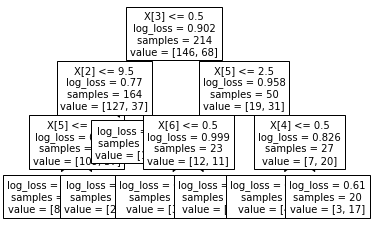

In [38]:
plot_tree(dt_id, fontsize=10)

In [39]:
from sklearn.svm import SVC

In [40]:
svm_li = SVC(kernel='linear')
svm_po = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

In [41]:
svm_li.fit(x_train, y_train)
svm_po.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

SVC()

In [42]:
li_train_pred = svm_li.predict(x_train)
li_test_pred = svm_li.predict(x_test)
po_train_pred = svm_po.predict(x_train)
po_test_pred = svm_po.predict(x_test)
rbf_train_pred = svm_rbf.predict(x_train)
rbf_test_pred = svm_rbf.predict(x_test)

In [43]:
print("Linear SVM Accuracy",  accuracy_score(li_train_pred,y_train))
print("Poly SVM Accuracy",  accuracy_score(po_train_pred,y_train))
print("RBF SVM Accuracy",  accuracy_score(rbf_train_pred,y_train))

Linear SVM Accuracy 0.7383177570093458
Poly SVM Accuracy 0.7523364485981309
RBF SVM Accuracy 0.7383177570093458


In [44]:
print("Linear SVM Accuracy",  accuracy_score(li_test_pred,y_test))
print("Poly SVM Accuracy",  accuracy_score(po_test_pred,y_test))
print("RBF SVM Accuracy",  accuracy_score(rbf_test_pred,y_test))

Linear SVM Accuracy 0.6805555555555556
Poly SVM Accuracy 0.75
RBF SVM Accuracy 0.7222222222222222


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn  = KNeighborsClassifier()

In [47]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [48]:
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)

In [49]:
print("KNN train Accuracy",  accuracy_score(knn_train_pred,y_train))

KNN train Accuracy 0.780373831775701


In [50]:
print("KNN test Accuracy",  accuracy_score(knn_test_pred,y_test))

KNN test Accuracy 0.6805555555555556


In [51]:
for i in range(1,11):
    print("Neighbors Value = ", i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn_train_pred = knn.predict(x_train)
    knn_test_pred = knn.predict(x_test)
    print("KNN train Accuracy",  accuracy_score(knn_train_pred,y_train))
    print("KNN test Accuracy",  accuracy_score(knn_test_pred,y_test))
    

Neighbors Value =  1
KNN train Accuracy 0.9766355140186916
KNN test Accuracy 0.6527777777777778
Neighbors Value =  2
KNN train Accuracy 0.7990654205607477
KNN test Accuracy 0.7083333333333334
Neighbors Value =  3
KNN train Accuracy 0.8177570093457944
KNN test Accuracy 0.625
Neighbors Value =  4
KNN train Accuracy 0.7850467289719626
KNN test Accuracy 0.7083333333333334
Neighbors Value =  5
KNN train Accuracy 0.780373831775701
KNN test Accuracy 0.6805555555555556
Neighbors Value =  6
KNN train Accuracy 0.7476635514018691
KNN test Accuracy 0.6944444444444444
Neighbors Value =  7
KNN train Accuracy 0.7429906542056075
KNN test Accuracy 0.6527777777777778
Neighbors Value =  8
KNN train Accuracy 0.7289719626168224
KNN test Accuracy 0.7361111111111112
Neighbors Value =  9
KNN train Accuracy 0.7289719626168224
KNN test Accuracy 0.7083333333333334
Neighbors Value =  10
KNN train Accuracy 0.7149532710280374
KNN test Accuracy 0.7222222222222222


In [53]:
training= []
testing=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    train_pred = knn.predict(x_train)
    test_pred  = knn.predict(x_test)
    training.append(accuracy_score(train_pred, y_train))
    testing.append(accuracy_score(test_pred,y_test))

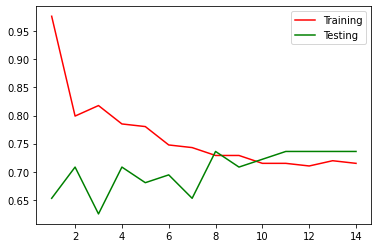

In [54]:
import matplotlib.pyplot as plt
k = range(1,15)
plt.plot(k, training, c='red', label="Training")
plt.plot(k, testing, c='green', label="Testing")
plt.legend()
plt.show()